<a href="https://colab.research.google.com/github/eternaldemon/Deep-Learning/blob/master/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
N=1500
x=(np.random.random((N,2))*10)-5
y=2*np.sin(x[:,0]) + 3*np.cos(x[:,1])

Equation is :

y = 2sin(x1) + 3cos(x2)

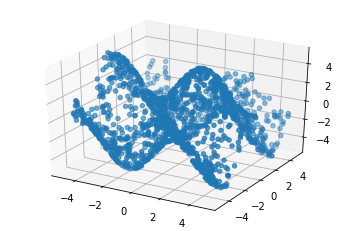

In [ ]:
fig=plt.figure()
temp=fig.add_subplot(111,projection='3d', )
temp.scatter3D(x[:,0],x[:,1],y)
plt.show()

3000

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(2,)))
model.add(tf.keras.layers.Dense(64,activation='relu',kernel_initializer='normal'))
model.add(tf.keras.layers.Dense(1))


#Learning rate is pretty bad so optimizing the learning rate by changing it manually

otp=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=otp,loss='mse')

model.output_shape

#If it still doesn't work try changing the metrics or removing the metrics totally.


(None, 1)

In [ ]:
temp = model.fit(x,y,epochs=1000)

Epoch 1/1000
47/47 [==============================] - 0s 1ms/step - loss: 4.7196
Epoch 2/1000
47/47 [==============================] - 0s 1ms/step - loss: 3.6356
Epoch 3/1000
47/47 [==============================] - 0s 1ms/step - loss: 2.9799
Epoch 4/1000
47/47 [==============================] - 0s 991us/step - loss: 2.6246
Epoch 5/1000
47/47 [==============================] - 0s 980us/step - loss: 2.4783
Epoch 6/1000
47/47 [==============================] - 0s 1ms/step - loss: 2.4167
Epoch 7/1000
47/47 [==============================] - 0s 989us/step - loss: 2.3471
Epoch 8/1000
47/47 [==============================] - 0s 980us/step - loss: 2.2935
Epoch 9/1000
47/47 [==============================] - 0s 1ms/step - loss: 2.4221
Epoch 10/1000
47/47 [==============================] - 0s 1ms/step - loss: 2.3242
Epoch 11/1000
47/47 [==============================] - 0s 1ms/step - loss: 2.2905
Epoch 12/1000
47/47 [==============================] - 0s 1ms/step - loss: 2.2397
Epoch 13/1000
47/

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


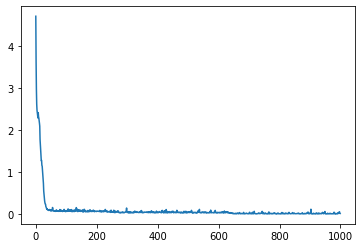

In [ ]:

plt.figure()
plt.plot(temp.history['loss'], label='LOSS')
plt.show()

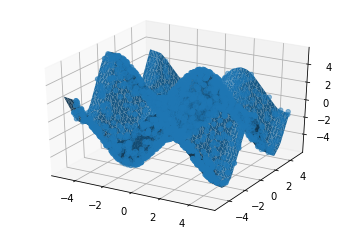

In [ ]:
#Prediction Surface
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0],x[:,1],y)

#Surface Plot
line = np.linspace(-5,5,50)
xx,yy=np.meshgrid(line,line)
xgrid=np.vstack((xx.flatten(),yy.flatten())).T
yhat=model.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:,0], xgrid[:,1], yhat, linewidth=0.1, antialiased=True)
plt.show()


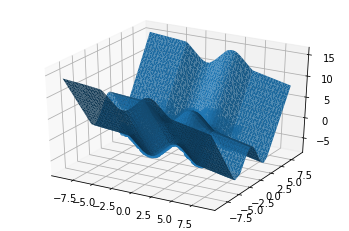

In [ ]:
#Does it extrapolate---->No, since we didn't use a periodic activation function

#Prediction Surface
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0],x[:,1],y)

#Surface Plot
line = np.linspace(-9,9,50) #change to see if it extrapolates
xx,yy=np.meshgrid(line,line)
xgrid=np.vstack((xx.flatten(),yy.flatten())).T
yhat=model.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:,0], xgrid[:,1], yhat, linewidth=0.1, antialiased=True)
plt.show()